# Predicting heart disease using machine learning

This notebook uses various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical records.

We are going to take the following approach:
1. Problem definition
2. Data
3. Evaluation metrics (What defines success?)
4. Features
5. Modeling 
6. Experimentation

## 1. Problem definition

In a statement 
> Given clinical parameters about a patient, can we predict whether they have heart disease or not?

## 2. Data (UCI Heart Disease Dataset)

The original data came from the Cleaveland database from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project. 

## 4. Features

The following information is taken from the database URLs given above:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina; chest pain related to decreased blood supply to heart.
    * 1: Atypical angina; chest pain not related to heart
    * 2: Non-angina pain; typically esophageal spasms (non-heart related)
    * 3: Asymptomatic; chest pain not showing signs of disease 
4. trestbps - resting blood pressure (in mm Hg on admission to hospital); anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dL
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dL) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged main pumping chamber        
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest; looks at stress of heart
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping; better heart rate with exercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downsloping: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by fluoroscopy
    * colored vessels means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thallum stress result
    * 1-3: normal
    * 6: fixed defect; used to be defect, but is ok now
    * 7: reversible defect; no proper blood movement when exercising
14. target - have disease or not (1 = yes, 0 = no); **the predicted attribute**

## Preparing our tools

We're going to use pandas, matplotlib, and NumPy for data analysis and manipulation.

In [13]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Force plots to display in Jupyter notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [14]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset with which we're working.

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, change, or remove features to get more out of your data?

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
# Let's find out the number of people with/without heart disease.
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

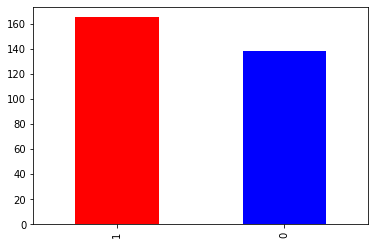

In [39]:
# Visualize these
df["target"].value_counts().plot(kind="bar", color=["red", "blue"]);

In [16]:
# Determine the datatypes in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [61]:
# Check if there are missing values.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
# Return various statistical metrics from our dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency with respect to Sex

In [22]:
# There appears to be more males than females in the dataset
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [23]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Comparing these feature variables suggests that a randomly chosen woman will have heart disease with a probability of about 75%, whilst this number is just under 50% for men. 

A random participant will have a 62.5% chance of presenting with heart disease.

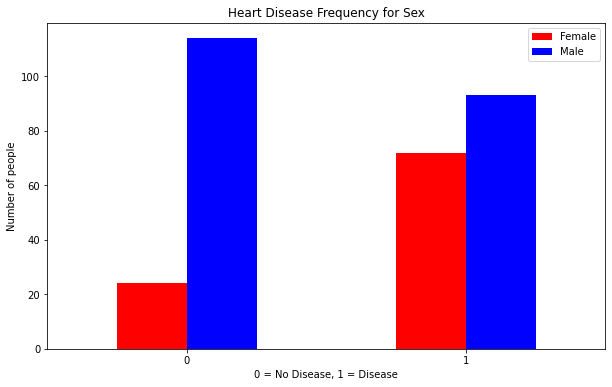

In [40]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                figsize=(10,6),
                                color=["red", "blue"]);
plt.title("Heart Disease Frequency for Sex");
plt.xlabel("0 = No Disease, 1 = Disease");
plt.ylabel("Number of people");
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs. Max Heart Rate for Heart Disease

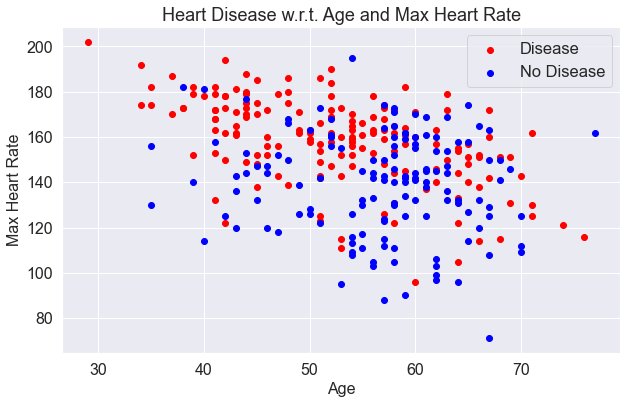

In [61]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="red");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="blue");

# Add some helpful info
plt.title("Heart Disease w.r.t. Age and Max Heart Rate")
plt.xlabel("Age", fontsize=16)
plt.ylabel("Max Heart Rate", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(["Disease", "No Disease"])

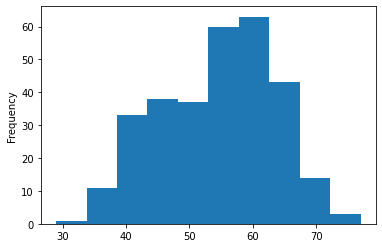

In [49]:
# Check the distribution of the age column with a histogram
df.age.plot.hist(bins=10);

## Heart Disease Frequency vs. Chest Pain Type

* cp - chest pain type
    * 0: Typical angina; chest pain related to decreased blood supply to heart.
    * 1: Atypical angina; chest pain not related to heart
    * 2: Non-angina pain; typically esophageal spasms (non-heart related)
    * 3: Asymptomatic; chest pain not showing signs of disease 

In [50]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


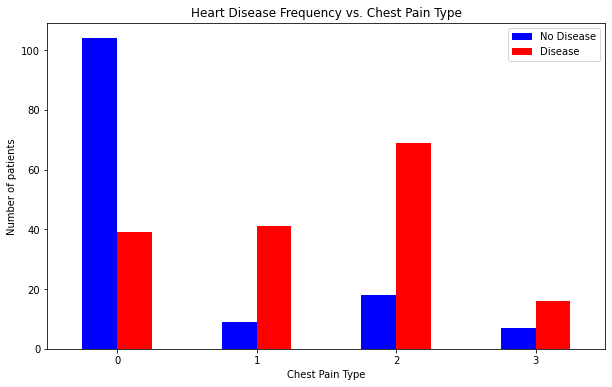

In [3]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["blue", "red"]);
plt.title("Heart Disease Frequency vs. Chest Pain Type");
plt.xlabel("Chest Pain Type");
plt.ylabel("Number of patients");
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

In [57]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


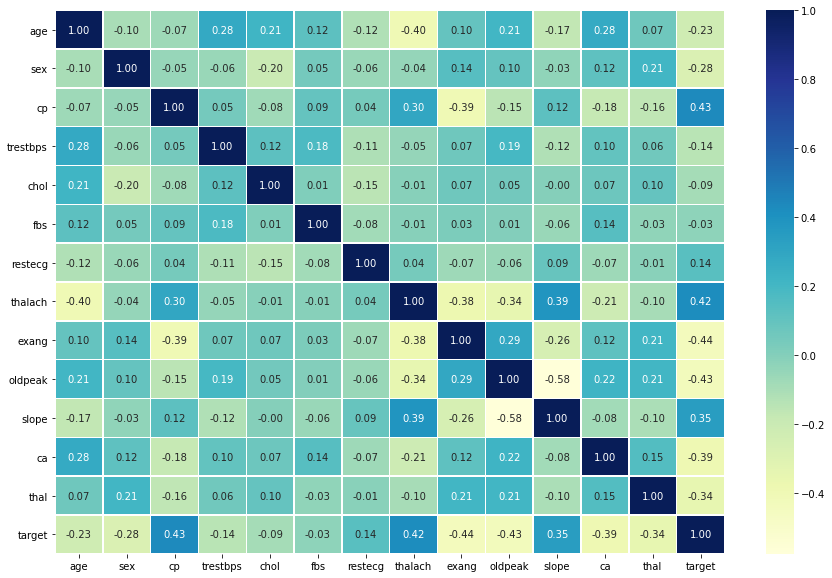

In [5]:
# Let's make the correlation matrix a little more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## 5(i). Modeling with Scikit-Learn

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [9]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [16]:
# Split the data into training and test sets
np.random.seed(42) # Set random seed to ensure reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [16]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now that we've split our data into training and test sets, it's time to build a machine learning model.

We'll train it (i.e. find the patterns) on the training set and then apply it (use the patterns found) on the test set.

We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [110]:
# Add models to a dictionary
models={"Logistic Regression": LogisticRegression(max_iter=100),
       "KNN": KNeighborsClassifier(),
       "Random Forest": RandomForestClassifier()}

# Create a function which fits and scores a model

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates a prescribed machine learning model.
    models: Dictionary of different Scikit-Learn machine learning models.
    X_train: Training data (no labels)
    X_test: Test data (no labels)
    y_train: Training labels
    y_test: Test labels
    """
    # Set random seed to ensure reproducibility
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores={}
    
    # Loop through models
    for name, model in models.items():
        
        # Fit the model to the data
        
        model.fit(X_train, y_train)
        
        # Evalute the model and append its value to model_scores
        
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [111]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\James\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison

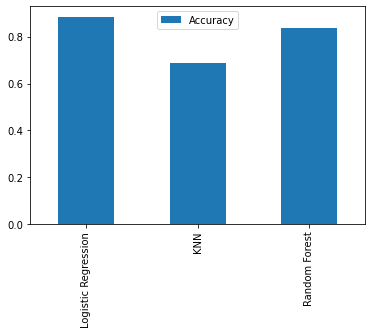

In [25]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

We now have a baseline model, **but we can do better**!

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve

### Hyperparameter tuning (by hand)

In [32]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n-neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n-neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the machine learning model
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [33]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [34]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


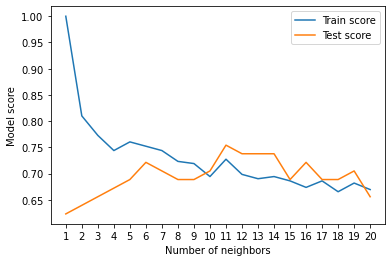

In [37]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter tuning with `RandomizedSearchCV`

We're going to tune:
* `LogisticRegression()`
* `RandomForestClassifier()`

In [23]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear","lbfgs"],
               "max_iter": [1500, 2000, 2500]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Now that we have hyperparameter grids setup for each of our models, we tune them using `RandomizedSearchCV`.

In [24]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=40,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=40,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [1500, 2000, 2500],
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=True)

In [27]:
# Check the best parameters found in the search
rs_log_reg.best_params_

{'solver': 'lbfgs', 'max_iter': 2500, 'C': 0.23357214690901212}

In [28]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now that we've tuned the `LogisticRegression()`, let's do the same for `RandomForestClassifier()`

In [29]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

# Fit the random hyperparameter search model to the training data
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
# Find the best hyperparameters from the random search
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [32]:
# Evaluate the randomized search RandomForestClassifier on the test data
rs_rf.score(X_test, y_test)

0.8688524590163934

In [36]:
# Compare to the baseline model
model_scores["Random Forest"]

0.8360655737704918

### Hyperparameter tuning with `GridSearchCV`

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using an exhaustive hyperparameter search.

In [106]:
np.random.seed(42)
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-10, 10, 300),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit instantiated search to training data
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [107]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.2314986671851156, 'solver': 'liblinear'}

In [108]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [112]:
# Compare to the baseline model
model_scores["Logistic Regression"]

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision, Recall, F1

with cross validation used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [20]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [21]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [115]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

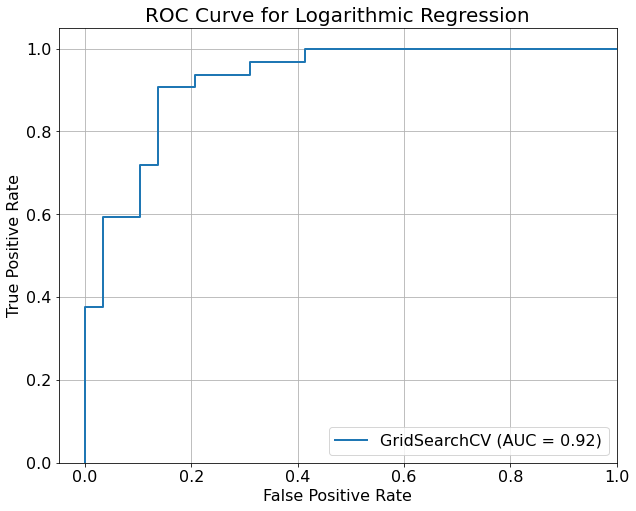

In [48]:
# Plot a ROC curve and calculate the AUC metric
fig, ax = plt.subplots(figsize=(10,8))
plot_roc_curve(gs_log_reg, X_test, y_test, ax=ax, lw=2)
ax.set_xlim([-0.05, 1])
ax.set_ylim([0, 1.05])
ax.grid(True)
ax.set_xlabel("False Positive Rate", fontsize=16)
ax.set_ylabel("True Positive Rate", fontsize=16)
ax.set_title("ROC Curve for Logarithmic Regression", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(fontsize=16, loc="lower right");

In [71]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


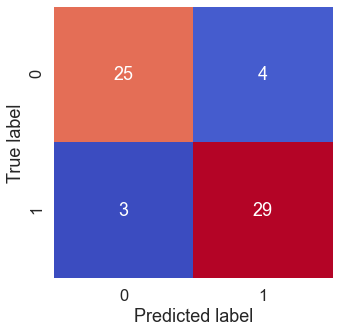

In [51]:
# Visualize this confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots an aesthetically pleasing confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False,
                    cmap = "coolwarm")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve and a confusion matrix, let's calculate a classification report and precision, recall, and f1 scores.

In [73]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We find the accuracy, precision, recall, and f1 scores of our model using `cross_val_score()`.

In [74]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.2314986671851156, 'solver': 'liblinear'}

In [77]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=gs_log_reg.best_params_['C'],
                        solver=gs_log_reg.best_params_['solver'])

In [78]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [79]:
# Find the mean of the cross-validation scores
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [80]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                        X,
                        y,
                        scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [81]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [82]:
# Cross-validated F1
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

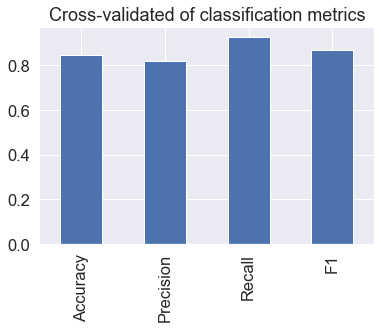

In [83]:
# Visualize cross_validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated of classification metrics",
                     legend=False);

### Feature Importance

>Which features contributed most to the outcomes of the model and to what extent did they contribute?

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance" in a search engine. 

Let's find the feature importance for our LogisticRegression model.

In [84]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=gs_log_reg.best_params_["C"],
                        solver=gs_log_reg.best_params_["solver"])

clf.fit(X_train, y_train);

In [85]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [86]:
# Check coef_ of the fitted model.
clf.coef_

array([[ 0.00366522, -0.90121199,  0.67380513, -0.01161069, -0.00170058,
         0.04754045,  0.33354611,  0.02471948, -0.62936025, -0.57547243,
         0.4695959 , -0.65068172, -0.6984598 ]])

In [87]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003665218174987577,
 'sex': -0.9012119912300959,
 'cp': 0.673805128378218,
 'trestbps': -0.011610692503579404,
 'chol': -0.0017005842740648446,
 'fbs': 0.04754044819996702,
 'restecg': 0.3335461056678284,
 'thalach': 0.024719475097186708,
 'exang': -0.6293602548302858,
 'oldpeak': -0.5754724316865227,
 'slope': 0.4695958950741912,
 'ca': -0.6506817218759927,
 'thal': -0.6984598008268107}

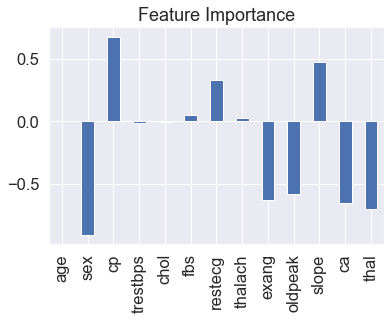

In [88]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [89]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [90]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping; better heart rate with exercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downsloping: signs of unhealthy heart

## 5(ii). Modeling with CatBoost

So far, we have used the Scikit-Learn package on our heart disease classification with some success. However, we now use CatBoost by Yandex, which uses gradient boosting on decision trees to see whether we can obtain even better results on accuracy, precision, recall, and f1 scores.

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
df.shape, df.dtypes

((303, 14),
 age           int64
 sex           int64
 cp            int64
 trestbps      int64
 chol          int64
 fbs           int64
 restecg       int64
 thalach       int64
 exang         int64
 oldpeak     float64
 slope         int64
 ca            int64
 thal          int64
 target        int64
 dtype: object)

In [54]:
# Split data into X and y sets. Furthermore, we must declare categorical features which contain string or integer data only.
X = df.drop("target", axis=1)
y = df["target"]

cat_features = np.where(X.dtypes != float)[0]

In [58]:
cat_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12], dtype=int64)

In [59]:
# Further split X and y into training and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [76]:
# We fit the model with the objective function "logloss",
#  given that we have a binary classification problem.
np.random.seed(42)

# Import the necessary model from the CatBoost package
from catboost import CatBoostClassifier

# Instantiate the gradient boosting classifier model
model = CatBoostClassifier(loss_function='Logloss', 
                           learning_rate=0.2,
    iterations=50, # Number of learning epochs. 
                   # The logloss function for the test data levels off at around 30 for a learning rate of 0.1
)

# Fit the model

model.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    plot=True, # Plot the Logloss w.r.t. epochs for training and test sets
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6336770	test: 0.6217254	best: 0.6217254 (0)	total: 4.5ms	remaining: 221ms
1:	learn: 0.5891553	test: 0.5816058	best: 0.5816058 (1)	total: 16ms	remaining: 385ms
2:	learn: 0.5536803	test: 0.5432798	best: 0.5432798 (2)	total: 27.6ms	remaining: 432ms
3:	learn: 0.5241026	test: 0.5087867	best: 0.5087867 (3)	total: 53.5ms	remaining: 616ms
4:	learn: 0.5034345	test: 0.4823945	best: 0.4823945 (4)	total: 72.4ms	remaining: 651ms
5:	learn: 0.4821884	test: 0.4663873	best: 0.4663873 (5)	total: 82.6ms	remaining: 606ms
6:	learn: 0.4655948	test: 0.4435781	best: 0.4435781 (6)	total: 91.1ms	remaining: 560ms
7:	learn: 0.4494345	test: 0.4243398	best: 0.4243398 (7)	total: 96.1ms	remaining: 504ms
8:	learn: 0.4358021	test: 0.4173783	best: 0.4173783 (8)	total: 107ms	remaining: 487ms
9:	learn: 0.4227561	test: 0.4111159	best: 0.4111159 (9)	total: 117ms	remaining: 467ms
10:	learn: 0.4129801	test: 0.4014167	best: 0.4014167 (10)	total: 127ms	remaining: 449ms
11:	learn: 0.4034021	test: 0.3945045	best: 0.39

In [80]:
# Print the learning and validation scores for the best iteration of the model
model.best_score_

{'learn': {'Logloss': 0.2531481237725626},
 'validation': {'Logloss': 0.34495560817280485}}

### Cross-validation

With a better idea of how CatBoost works and having developed a baseline model, we now perform 5-fold cross-validation on the best model to better gauge its mean logloss.

To do this, we must first import and employ CatBoost's `Pool` and input our dataset into it, before using the function `cv`.

In [83]:
# Import the necessary tools for cross-validation with CatBoost.
from catboost import cv, Pool

# Specify the pool data
pool = Pool(X, label=y, cat_features=cat_features)

# Specify the parameters of the CatBoost classifier to be used
# in the cross-validation.

parameters = {"loss_function": "Logloss",
             "iterations": 50,
             "learning_rate": 0.2,
             "custom_loss": "AUC", # Specify a custom loss function
             "random_state": 42    # Set random seed for reproducibility
             }

# Cross-validate the model

cv_data = cv(pool = pool,
            params = parameters,
            fold_count=5,
            shuffle=True,
            partition_random_seed=0,
            plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5810568	test: 0.5864916	best: 0.5864916 (0)
1:	learn: 0.4985434	test: 0.5168680	best: 0.5168680 (1)
2:	learn: 0.4392674	test: 0.4732585	best: 0.4732585 (2)
3:	learn: 0.3918364	test: 0.4393213	best: 0.4393213 (3)
4:	learn: 0.3618651	test: 0.4232490	best: 0.4232490 (4)
5:	learn: 0.3388621	test: 0.4120148	best: 0.4120148 (5)
6:	learn: 0.3178773	test: 0.4072559	best: 0.4072559 (6)
7:	learn: 0.2994552	test: 0.4028495	best: 0.4028495 (7)
8:	learn: 0.2803194	test: 0.4031061	best: 0.4028495 (7)
9:	learn: 0.2669595	test: 0.4006741	best: 0.4006741 (9)
10:	learn: 0.2556084	test: 0.3999931	best: 0.3999931 (10)
11:	learn: 0.2487156	test: 0.3990816	best: 0.3990816 (11)
12:	learn: 0.2378133	test: 0.3981589	best: 0.3981589 (12)
13:	learn: 0.2300436	test: 0.3945808	best: 0.3945808 (13)
14:	learn: 0.2241886	test: 0.3961315	best: 0.3945808 (13)
15:	learn: 0.2135520	test: 0.3968866	best: 0.3945808 (13)
16:	learn: 0.2043166	test: 0.3999664	best: 0.3945808 (13)
17:	learn: 0.1997999	test: 0.40237

In [84]:
# Print out the Logloss means from the cross-validation 
cv_data.head()

,iterations,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std,test-AUC-mean,test-AUC-std
0,0,0.586492,0.027584,0.581057,0.020558,0.852806,0.051081
1,1,0.516868,0.024381,0.498543,0.023766,0.887454,0.037573
2,2,0.473258,0.029966,0.439267,0.019349,0.889807,0.038413
3,3,0.439321,0.037659,0.391836,0.022218,0.901359,0.038099
4,4,0.423249,0.056875,0.361865,0.018440,0.902152,0.042919


In [86]:
# Print out the optimized Logloss metric for the test data
best_value = np.min(cv_data["test-Logloss-mean"])
best_iter  = np.argmin(cv_data["test-Logloss-mean"])
best_uncer = cv_data["test-Logloss-std"][best_iter]

print(f"The minimum logloss on test data was {best_value:.4f} +/- {best_uncer:.4f} on iteration {best_iter}")

The minimum logloss on test data was 0.3929 +/- 0.0927 on iteration 23


### Evaluation of CatBoost Classifier model

**Receiver of Characteristic Curve**

In [55]:
from catboost import Pool
from catboost.utils import get_roc_curve
from sklearn.metrics import auc

# Create a test pool from test data.
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# Calculate a ROC curve from the model and test pool
roc_curve = get_roc_curve(model, test_pool)

# Obtain fpr (false positive rate) and tpr (true positive rate)
# and thresholds.
(fpr, tpr, thresholds) = roc_curve
roc_auc = auc(fpr, tpr)

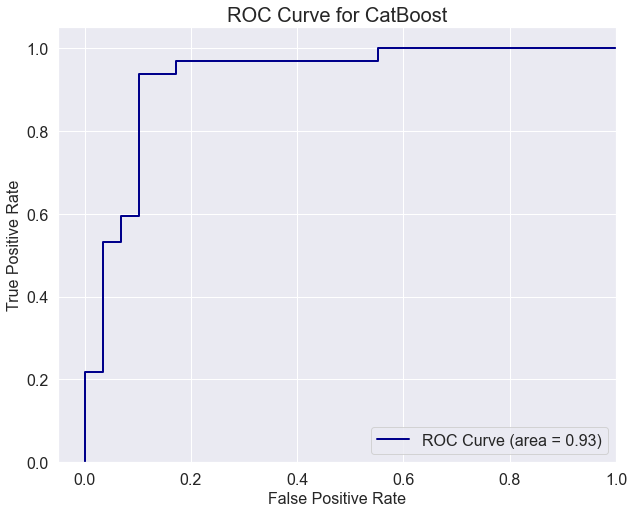

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

plt.plot(fpr, tpr, color="darkblue", linewidth=2,
        label=f"ROC Curve (area = {roc_auc:.2f})")

plt.xlim([-0.05, 1])
plt.ylim([0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.title("ROC Curve for CatBoost", fontsize=20)
plt.legend(fontsize=16)
plt.show();

**Confusion Matrix**

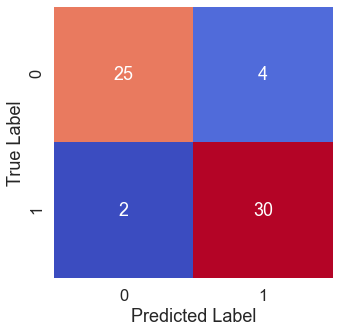

In [59]:
from catboost.utils import get_confusion_matrix
import seaborn as sns

# Plot the confusion matrix data from the model

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.heatmap(get_confusion_matrix(model, test_pool),
                annot=True,
                cmap="coolwarm",
                cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label");

**Other metrics**

In [141]:
# Create a dictionary storing the accuracy, precision, recall,
# and f1.
metrics = ["Accuracy", "Precision", "Recall", "F1"]
metrics_data = model.eval_metrics(test_pool,
                  metrics=metrics)

# Print out the results of the best iteration of the model.
for metric in metrics:
    print(f"{metric} for best iteration (i.e. {best_iter}):{metrics_data[metric][best_iter]*100:.2f}%")

Accuracy for best iteration (i.e. 23):88.52%
Precision for best iteration (i.e. 23):87.88%
Recall for best iteration (i.e. 23):90.62%
F1 for best iteration (i.e. 23):89.23%


In [142]:
# Compare with the LogisticRegression model from Scikit-Learn
gs_log_reg.score(X_test, y_test), metrics_data["Accuracy"][23]

(0.8852459016393442, 0.8852459016393442)

**Feature Importance**

In [149]:
# Obtain the feature importance of the data.
feature_data = model.get_feature_importance(prettified=True)
feature_data

,Feature Id,Importances
0,ca,28.543552
1,cp,24.101786
2,thal,17.122196
3,slope,8.517138
4,oldpeak,6.035018
5,exang,5.701467
6,age,3.995759
7,trestbps,2.371599
8,sex,1.856798
9,restecg,1.754686


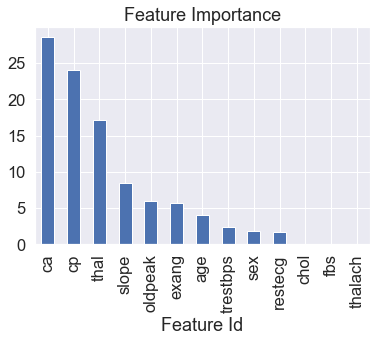

In [164]:
feature_data.plot.bar(title="Feature Importance", legend=False,
                     x="Feature Id", y="Importances");

## 6. Experimentation

What are some other improvements we could try?
* Could we collect more data?
* Could we try a better model? (XGBoost)
* Could we improve the current models? 

In [169]:
# Export best LogisticRegression model from Scikit-Learn
from joblib import dump, load
dump(gs_log_reg, "logistic_regression.joblib")

# Export best CatBoostClassifer from CatBoost
model.save_model("catboostclass_model.bin")

In [8]:
from joblib import dump, load
import catboost
from catboost import CatBoostClassifier

In [19]:
# Check that these models can be imported
gs_log_reg = load("logistic_regression.joblib")

model = CatBoostClassifier()
model.load_model("catboostclass_model.bin") 

In [60]:
log_model.score(X_test, y_test)

0.8852459016393442

In [173]:
model.eval_metrics(test_pool, "Accuracy")["Accuracy"][23]

0.8852459016393442